# Assignment (Option 1)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

## Importing the dataset

In [2]:
dataset = pd.read_csv('datasets\3_seattle_weather_1948-2017.csv')

In [3]:
datetime_object = []
for x in dataset["DATE"]:
    datetime_object.append(datetime.strptime(x, '%Y-%m-%d'))
    
def to_integer(dt_time):
    return 10000*dt_time.year + 100*dt_time.month + dt_time.day

int_Date = []
for z in datetime_object:
    int_Date.append(to_integer(z))
dataset["DATE"] = int_Date

In [4]:
dataset.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,19480101,0.47,51,42,True
1,19480102,0.59,45,36,True
2,19480103,0.42,45,35,True
3,19480104,0.31,45,34,True
4,19480105,0.17,45,32,True


In [5]:
dataset.dtypes

DATE      int64
PRCP    float64
TMAX      int64
TMIN      int64
RAIN     object
dtype: object

In [6]:
dataset=dataset.drop('DATE',axis=1)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PRCP    25548 non-null  float64
 1   TMAX    25551 non-null  int64  
 2   TMIN    25551 non-null  int64  
 3   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 798.6+ KB


In [8]:
X = dataset.drop('RAIN',axis=1)
y = dataset['RAIN']

C:\Users\madna\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 720x1440 with 0 Axes>

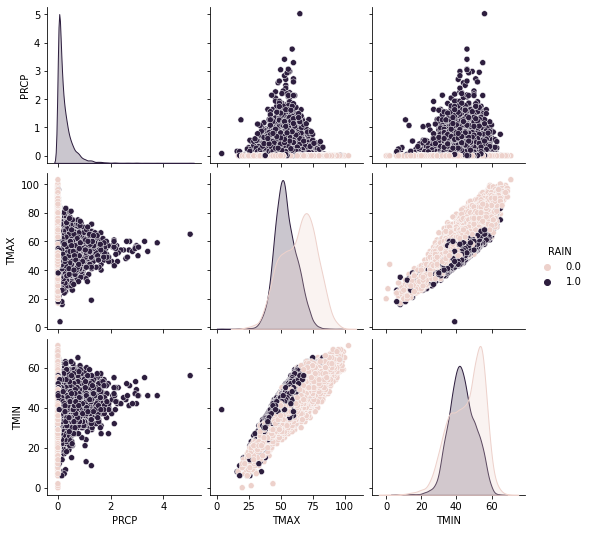

In [9]:
plt.figure(figsize=(10,20))
sns.pairplot(dataset, hue='RAIN');

## Correlation plot

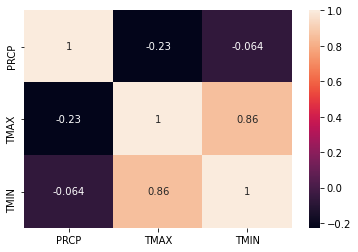

In [10]:
# Weak Correlation --> below 0.5 
# Correlation --> 0.5 - 0.7
# Strong Correlation --> more than 0.7

corr = dataset.corr()

corr.style.background_gradient(cmap='coolwarm')
sns.heatmap(corr,annot=True);

## Target variable distribution

C:\Users\madna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


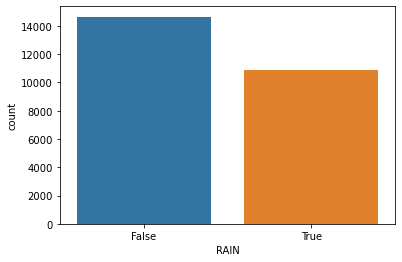

In [11]:
sns.countplot(dataset.RAIN);

## Dropping Null Values

In [12]:
dataset.isna().sum()

PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [13]:
dataset=dataset.dropna()

In [14]:
dataset.isna().sum()

PRCP    0
TMAX    0
TMIN    0
RAIN    0
dtype: int64

In [15]:
dataset["RAIN"] = dataset["RAIN"].astype(int)

# Seperating dataset

In [16]:
X=dataset.drop('RAIN',axis=1)
y=dataset['RAIN']

## Splitting the dataset into the Training set and Test set

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature scaling

In [18]:
sc = StandardScaler()

# Note: We are scaling all the variables "Age and Salary" for improved performance 
# The scaling will be between 3 and -3 

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Logistic Regression Model

In [19]:
classifier = LogisticRegression(random_state = 0)

classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [20]:
y_pred=classifier.predict(X_test)

## Model Accuracy

In [21]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.97


## COnfusion matrix

In [22]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[3669    0]
 [ 211 2507]]


## AUC ROC CURVE

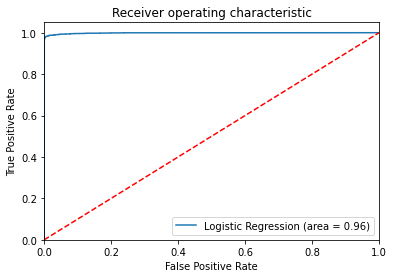

In [23]:
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()